In [ ]:
# Package Import 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from nltk.corpus import stopwords
import string
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import mutual_info_classif
import numpy as np
## for vectorizer
from sklearn import feature_extraction, manifold
## for word embedding
import gensim.downloader as gensim_api
## for topic modeling
import gensim
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 2.6 MB/s eta 0:00:00


In [ ]:
train_data = pd.read_csv("train.csv")
train_data.head()
print('\n')
train_data.info()
print('\n')
train_data.isna().sum()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB




id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Split datasets into train and test sets
Xtrain_df, Xtest_df, ytrain_df, ytest_df = train_test_split(train_data["text"], train_data["target"], test_size=0.2, random_state=42)



In [ ]:
### Search parameters for TfidfVectorizer function
# Build the machine learning model using Logistic Regression, Naive Bayes, and Linear SVC
estimators = [
    ("lr", LogisticRegression()),
    ("nb", MultinomialNB()),
    ("svc", LinearSVC())
]
clf = StackingClassifier(
    estimators=estimators)
# parameter ranges
param_grid = {'tfidf_vect__stop_words': [None, 'english'],
                  'tfidf_vect__min_df': [1,2,3, 5],
              'tfidf_vect__max_df': [1,0.9,0.8,0.7],
                  'tfidf_vect__ngram_range':[(1,1),(1,2),(1,3)]}                  
  
pipe = Pipeline([('tfidf_vect', TfidfVectorizer(token_pattern=r'(?u)\b[A-Za-z]+\b')), 
                         ('clf', StackingClassifier(estimators=estimators))])
search = GridSearchCV(pipe, param_grid,scoring='f1',cv=5, n_jobs=-1)
search.fit(Xtrain_df, ytrain_df)
best_param = search.best_params_
print("Best parameter (f1 score=%0.3f):" % search.best_score_)
print(best_param)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vect',
                                        TfidfVectorizer(token_pattern='(?u)\\b[A-Za-z]+\\b')),
                                       ('clf',
                                        StackingClassifier(estimators=[('lr',
                                                                        LogisticRegression()),
                                                                       ('nb',
                                                                        MultinomialNB()),
                                                                       ('svc',
                                                                        LinearSVC())]))]),
             n_jobs=2,
             param_grid={'tfidf_vect__max_df': [1, 0.9, 0.8, 0.7],
                         'tfidf_vect__max_features': [None, 10000, 8000, 6000,
                                                      4000, 3000],
                         'tfidf_vect__min_df': [1, 2, 3, 5],
                         'tfidf_vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tfidf_vect__stop_words': [None, 'english']},
             scoring='f1')

Best parameter (f1 score=0.760):
{'tfidf_vect__max_df': 0.9, 'tfidf_vect__max_features': None, 'tfidf_vect__min_df': 2, 'tfidf_vect__ngram_range': (1, 1), 'tfidf_vect__stop_words': None}


In [ ]:
y_train = ytrain_df.to_numpy()
y_test = ytest_df.to_numpy()
y_train
# Create TF-IDF features
tfidf = TfidfVectorizer(stop_words=None,token_pattern=r'(?u)\b[A-Za-z]+\b',
                        min_df=2,max_df=0.9,max_features=None)
X_train_tf = tfidf.fit_transform(Xtrain_df)
X_test_tf = tfidf.transform(Xtest_df)
# Get preprocessed tokenized 1-gram features from tfidfVectorizer
tokenized_features = tfidf.get_feature_names_out()
print('Number of features:',len(tokenized_features))
X_train_tf_df = pd.DataFrame(X_train_tf.toarray(),columns=tokenized_features)
X_train_tf_df.head()
X_test_tf_df = pd.DataFrame(X_test_tf.toarray(),columns=tokenized_features)

array([1, 0, 1, ..., 0, 1, 1])

Number of features: 5370


,a,aa,aba,abandon,abandoned,abbott,abbswinston,abc,abcnews,abe,...,zarry,zayn,zero,zimbabwe,zionism,zionist,zombie,zone,zouma,zss
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.11934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
### Search parameters for CountVectorizer function
# parameter ranges
param_grid = {'count_vect__stop_words': [None, 'english'],
                  'count_vect__min_df': [1,2,3, 5],
              'count_vect__max_df': [1,0.9,0.8,0.7],
                  'count_vect__ngram_range':[(1,1),(1,2),(1,3)]}                   
  
pipe = Pipeline([('count_vect', CountVectorizer(token_pattern=r'(?u)\b[A-Za-z]+\b')), 
                         ('clf', StackingClassifier(estimators=estimators))])
search = GridSearchCV(pipe, param_grid,scoring='f1',cv=5, n_jobs=-1)
search.fit(Xtrain_df, ytrain_df)
best_param = search.best_params_
print("Best parameter (f1 score=%0.3f):" % search.best_score_)
print(best_param)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-pa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('count_vect',
                                        CountVectorizer(token_pattern='(?u)\\b[A-Za-z]+\\b')),
                                       ('clf',
                                        StackingClassifier(estimators=[('lr',
                                                                        LogisticRegression()),
                                                                       ('nb',
                                                                        MultinomialNB()),
                                                                       ('svc',
                                                                        LinearSVC())]))]),
             n_jobs=-1,
             param_grid={'count_vect__max_df': [1, 0.9, 0.8, 0.7],
                         'count_vect__min_df': [1, 2, 3, 5],
                         'count_vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'count_vect__stop_words': [None, 'english']},
             scoring='f1')

Best parameter (f1 score=0.759):
{'count_vect__max_df': 0.9, 'count_vect__min_df': 2, 'count_vect__ngram_range': (1, 1), 'count_vect__stop_words': None}


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a CountVectorizer object and fit it to the training data
vectorizer = CountVectorizer(stop_words=None,token_pattern=r'(?u)\b[A-Za-z]+\b',
                        min_df=2,max_df=0.9,max_features=None)
X_train_Ct = vectorizer.fit_transform(Xtrain_df)
X_test_Ct = vectorizer.transform(Xtest_df)

# Count the unique words in the vocabulary
unique_words = (vectorizer.vocabulary_)
Ct_features = vectorizer.get_feature_names_out()
print('Number of features:',len(Ct_features))

print("Unique words in the training dataset:", unique_words)
Ct_features
X_train_Ct.toarray()

Number of features: 5370
Unique words in the training dataset: {'and': 167, 'honest': 2237, 'analysis': 164, 'of': 3275, 'need': 3159, 'to': 4780, 'use': 5002, 'atomic': 295, 'bomb': 557, 'in': 2349, 'japanese': 2484, 'military': 2991, 'refused': 3837, 'surrender': 4570, 'https': 2272, 't': 4603, 'co': 930, 'b': 349, 'a': 0, 'shame': 4178, 'if': 2321, 'that': 4695, 'golf': 2006, 'cart': 759, 'became': 420, 'engulfed': 1537, 'flames': 1795, 'tell': 4656, 'barackobama': 377, 'medals': 2920, 'given': 1984, 'us': 4998, 'soldiers': 4341, 'at': 289, 'the': 4697, 'massacre': 2888, 'wounded': 5292, 'knee': 2586, 'sign': 4238, 'now': 3231, 'amp': 161, 'rt': 4013, 'worried': 5281, 'about': 15, 'how': 2270, 'ca': 684, 'drought': 1410, 'might': 2981, 'affect': 78, 'you': 5344, 'extreme': 1652, 'weather': 5162, 'does': 1354, 'it': 2458, 'our': 3360, 'economy': 1465, 'http': 2271, 'youngheroesid': 5348, 'lava': 2651, 'blast': 511, 'power': 3603, 'red': 3828, 'pantherattack': 3407, 'wreckage': 5300, 

array(['a', 'aa', 'aba', ..., 'zone', 'zouma', 'zss'], dtype=object)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Combine the two feature matrix into one matrix
X_train = np.concatenate((X_train_tf.toarray(),X_train_Ct.toarray()),axis=1)
X_test = np.concatenate((X_test_tf.toarray(),X_test_Ct.toarray()),axis=1)

features = list(tokenized_features) + [i+'_ct' for i in list(Ct_features)]

X_train_df = pd.DataFrame(X_train,columns=features)
X_test_df = pd.DataFrame(X_test,columns=features)

X_train_df.head()

,a,aa,aba,abandon,abandoned,abbott,abbswinston,abc,abcnews,abe,...,zarry_ct,zayn_ct,zero_ct,zimbabwe_ct,zionism_ct,zionist_ct,zombie_ct,zone_ct,zouma_ct,zss_ct
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.11934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
### Run the ensemble model with the three feature matrix to get performance rpeort
# Build the machine learning model using Logistic Regression, Naive Bayes, and Linear SVC
estimators = [
    ("lr", LogisticRegression(max_iter=200)),
    ("nb", MultinomialNB()),
    ("svc", LinearSVC())
]
clf = StackingClassifier(
    estimators=estimators
)

# Fit the model to the training data
# clf.fit(X_train, y_train)
# clf.fit(X_train_tf, y_train)
clf.fit(X_train_Ct, y_train)


#Make predictions on the testing data

# y_pred = clf.predict(X_test)
# y_pred = clf.predict(X_test_tf)
y_pred = clf.predict(X_test_Ct)

#Evaluate the model's performance
print("Result of Using raw tfidf with 1gram")
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

Result of Using raw tfidf with 1gram
Accuracy score: 0.8030203545633617
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       874
           1       0.79      0.73      0.76       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.80      1523
weighted avg       0.80      0.80      0.80      1523



Accuracy of model at K=57 is 0.7925147734734077


KNeighborsClassifier(n_neighbors=60)

Accuracy of model is 0.7872619829284307


KNeighborsClassifier(n_neighbors=61)

Accuracy of model is 0.7925147734734077


KNeighborsClassifier(n_neighbors=62)

Accuracy of model is 0.7892317793827971


KNeighborsClassifier(n_neighbors=63)

Accuracy of model is 0.7872619829284307


KNeighborsClassifier(n_neighbors=64)

Accuracy of model is 0.7866053841103086


KNeighborsClassifier(n_neighbors=65)

Accuracy of model is 0.7866053841103086


KNeighborsClassifier(n_neighbors=66)

Accuracy of model is 0.7839789888378201


KNeighborsClassifier(n_neighbors=67)

Accuracy of model is 0.7839789888378201


KNeighborsClassifier(n_neighbors=68)

Accuracy of model is 0.788575180564675


KNeighborsClassifier(n_neighbors=69)

Accuracy of model is 0.7866053841103086


KNeighborsClassifier(n_neighbors=70)

Accuracy of model is 0.7892317793827971


KNeighborsClassifier(n_neighbors=71)

Accuracy of model is 0.7866053841103086


KNeighborsClassifier(n_neighbors=72)

Accuracy of model is 0.7866053841103086


KNeighborsClassifier(n_neighbors=73)

Accuracy of model is 0.7859487852921865


KNeighborsClassifier(n_neighbors=74)

Accuracy of model is 0.7866053841103086


KNeighborsClassifier(n_neighbors=75)

Accuracy of model is 0.7852921864740644


KNeighborsClassifier(n_neighbors=76)

Accuracy of model is 0.7866053841103086


KNeighborsClassifier(n_neighbors=77)

Accuracy of model is 0.7866053841103086


KNeighborsClassifier(n_neighbors=78)

Accuracy of model is 0.7846355876559422


KNeighborsClassifier(n_neighbors=79)

Accuracy of model is 0.7839789888378201


KNeighborsClassifier(n_neighbors=80)

Accuracy of model is 0.7820091923834537


KNeighborsClassifier(n_neighbors=81)

Accuracy of model is 0.7820091923834537


KNeighborsClassifier(n_neighbors=82)

Accuracy of model is 0.7813525935653316


KNeighborsClassifier(n_neighbors=83)

Accuracy of model is 0.7787261982928431


KNeighborsClassifier(n_neighbors=84)

Accuracy of model is 0.7806959947472094


KNeighborsClassifier(n_neighbors=85)

Accuracy of model is 0.7826657912015759


KNeighborsClassifier(n_neighbors=86)

Accuracy of model is 0.7852921864740644


KNeighborsClassifier(n_neighbors=87)

Accuracy of model is 0.7872619829284307


KNeighborsClassifier(n_neighbors=88)

Accuracy of model is 0.7846355876559422


KNeighborsClassifier(n_neighbors=89)

Accuracy of model is 0.7859487852921865


KNeighborsClassifier(n_neighbors=90)

Accuracy of model is 0.7879185817465528


KNeighborsClassifier(n_neighbors=91)

Accuracy of model is 0.7866053841103086


KNeighborsClassifier(n_neighbors=92)

Accuracy of model is 0.7826657912015759


KNeighborsClassifier(n_neighbors=93)

Accuracy of model is 0.7826657912015759


KNeighborsClassifier(n_neighbors=94)

Accuracy of model is 0.7800393959290873


KNeighborsClassifier(n_neighbors=95)

Accuracy of model is 0.7813525935653316


KNeighborsClassifier(n_neighbors=96)

Accuracy of model is 0.7800393959290873


KNeighborsClassifier(n_neighbors=97)

Accuracy of model is 0.7806959947472094


KNeighborsClassifier(n_neighbors=98)

Accuracy of model is 0.7800393959290873


KNeighborsClassifier(n_neighbors=99)

Accuracy of model is 0.7813525935653316


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Error Rate vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Error Rate')

Minimum error:- 0.20748522652659226 at K = 61


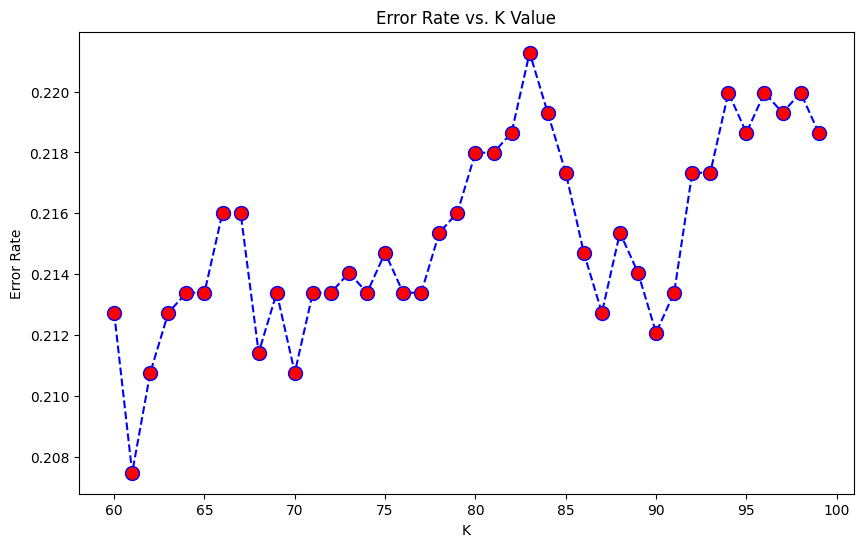

In [ ]:
### Find the optimal K for KNN to use for calculating Mutual Infomration score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 61
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_tf,y_train)
Pred_y = neigh.predict(X_test_tf)
print("Accuracy of model at K=57 is",metrics.accuracy_score(y_test, Pred_y))
error_rate = []
ranges = list(range(60,100))
for i in ranges:
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))
 print("Accuracy of model is",metrics.accuracy_score(y_test, pred_i))


plt.figure(figsize=(10,6))
plt.plot(ranges,error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",ranges[error_rate.index(min(error_rate))])

In [ ]:
### Calculate the mutual information score for all the features
import warnings
# run block of code and catch warnings
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    # execute code that will generate warnings
    importances = mutual_info_classif(X_train_tf,np.array(y_train),
                                  discrete_features='auto',n_neighbors=61,random_state=166)
feat_importances = pd.Series(importances,index=X_train_tf_df.columns).sort_values()[::-1]
# feat_importances1 = feat_importances[feat_importances>0.000295] # around 3000 features
# feat_importances1
# feat_importances1.plot(ylim=(0,0.005),kind='bar')

In [ ]:
### Define the function that takes in a threshold and filter out features not meeting the threshold
def mutual_info(X,threshold,feat_importances=feat_importances):
    feat_importances1 = feat_importances[feat_importances>=threshold] # around 3000 features
    X_ = X[feat_importances1.index].to_numpy()
    
    return X_
# X_train_df_new = mutual_info(X_train_df,0.000295)
# X_test_df_new = mutual_info(X_test_df,0.000295)
# len(X_train_df_new.columns)
# X_train_new = X_train_df_new.to_numpy()
# X_test_new = X_test_df_new.to_numpy()

In [ ]:
feat_importances

t            0.400288
co           0.373506
http         0.343489
the          0.212979
in           0.168494
               ...   
collins      0.000003
describes    0.000003
linkury      0.000002
starring     0.000002
realise      0.000002
Length: 5370, dtype: float64

In [ ]:
### Find the threshold with the best accuracy
#### >=0
clf = StackingClassifier(estimators=estimators)
best_param = 0
best_score = 0
params = [0,feat_importances[4500],feat_importances[4300],feat_importances[3800],
          feat_importances[3500],feat_importances[4000]]
for param in params:
    
    clf.fit(mutual_info(X_train_tf_df,param),y_train)
    y_pred = clf.predict(mutual_info(X_test_tf_df,param))
    score = accuracy_score(y_test, y_pred)
    if score > best_score:
        best_param = param
        best_score = score
    print(param,score)

                        

print("Best parameter (f1 score=%0.3f):" % best_score)
print(best_param)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

0 0.8063033486539725


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

0.00023083533391599618 0.8049901510177282


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

0.00023083533391599618 0.8049901510177282


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

0.00027682363219922986 0.8023637557452397


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

0.0002774661712586224 0.8017071569271176


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

0.00023083533391599618 0.8049901510177282
Best parameter (f1 score=0.806):
0


In [ ]:
# Calculate the performance if there is a update from filtering with mutual information score
# Build the machine learning model using Logistic Regression, Naive Bayes, and Linear SVC
estimators = [
    ("lr", LogisticRegression(max_iter=200)),
    ("nb", MultinomialNB()),
    ("svc", LinearSVC())
]
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression())

# clf.fit(X_train, y_train)
clf.fit(X_train_tf, y_train)
# clf.fit(X_train_Ct, y_train)


#Make predictions on the testing data

# y_pred = clf.predict(X_test)
y_pred = clf.predict(X_test_tf)
# y_pred = clf.predict(X_test_Ct)

#Evaluate the model's performance
print("Result of Using raw tfidf with 1gram")
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())],
                   final_estimator=LogisticRegression())

Result of Using raw tfidf with 1gram
Accuracy score: 0.8063033486539725
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       874
           1       0.80      0.73      0.76       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.80      1523



In [ ]:
# Calculate correlation matrix for all features
# X_train_df = X_train_df[feat_importances1.index]
X_train_tf_df['y_value'] = y_train
cor = np.corrcoef(X_train_tf_df.to_numpy(), rowvar=False)
cor = pd.DataFrame(cor,columns=X_train_tf_df.columns,index=X_train_tf_df.columns)
X_train_tf_df=X_train_tf_df.drop('y_value',axis=1)
# X_train_df.corr()
cor

,a,aa,aba,abandon,abandoned,abbott,abbswinston,abc,abcnews,abe,...,zayn,zero,zimbabwe,zionism,zionist,zombie,zone,zouma,zss,y_value
a,1.000000,0.005699,-0.021194,-0.011058,-0.016737,0.010653,-0.012775,-0.030452,0.027520,0.006187,...,-0.000098,-0.008997,0.033450,-0.002053,-0.006342,-0.000156,0.065227,-0.011043,0.015910,-0.006676
aa,0.005699,1.000000,-0.000930,-0.000485,-0.000734,-0.000482,-0.000561,-0.001336,-0.000549,-0.000396,...,-0.000479,-0.000395,-0.000396,-0.000477,-0.000626,-0.000604,-0.001477,-0.000485,-0.000396,-0.000707
aba,-0.021194,-0.000930,1.000000,-0.000943,-0.001427,-0.000936,-0.001090,-0.002597,-0.001067,-0.000770,...,-0.000930,-0.000767,-0.000770,-0.000928,-0.001218,-0.001174,-0.002872,-0.000942,-0.000771,-0.005205
abandon,-0.011058,-0.000485,-0.000943,1.000000,-0.000745,-0.000489,-0.000568,-0.001355,-0.000557,-0.000402,...,-0.000485,-0.000400,-0.000402,-0.000484,-0.000635,-0.000612,-0.001498,-0.000491,-0.000402,-0.004526
abandoned,-0.016737,-0.000734,-0.001427,-0.000745,1.000000,-0.000739,-0.000860,-0.002051,-0.000843,-0.000608,...,-0.000735,-0.000606,-0.000608,-0.000733,-0.000962,-0.000927,-0.002268,-0.000744,-0.000609,0.026878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,-0.000156,-0.000604,-0.001174,-0.000612,-0.000927,-0.000608,-0.000707,-0.001686,-0.000693,-0.000500,...,-0.000604,-0.000498,-0.000500,-0.000603,-0.000791,1.000000,-0.001864,-0.000611,-0.000500,-0.013153
zone,0.065227,-0.001477,-0.002872,-0.001498,-0.002268,-0.001488,-0.001731,-0.004126,-0.001695,-0.001223,...,-0.001478,-0.001219,-0.001224,-0.001474,-0.001934,-0.001864,1.000000,-0.001496,-0.001224,-0.012671
zouma,-0.011043,-0.000485,-0.000942,-0.000491,-0.000744,-0.000488,-0.000568,-0.001353,-0.000556,-0.000401,...,-0.000485,-0.000400,-0.000401,-0.000484,-0.000634,-0.000611,-0.001496,1.000000,-0.000402,-0.019262
zss,0.015910,-0.000396,-0.000771,-0.000402,-0.000609,-0.000399,-0.000464,-0.001107,-0.000455,-0.000328,...,-0.000397,-0.000327,-0.000328,-0.000396,-0.000519,-0.000500,-0.001224,-0.000402,1.000000,-0.015760


In [ ]:
# Statistics of absolute value of correlaiton
abs(cor['y_value']).describe()
### Define the function that takes in a threshold and filter out features not meeting the threshold
def cor_features(X,threshold,cor=cor):
    filtered_features = list(cor['y_value'][abs(cor)['y_value']>threshold].index) # mean value is the best option
    # filtered_features
    filtered_features.remove('y_value')
    X_ = X[filtered_features].to_numpy()
    return X_
print('\n')
X_train_tf_cor = cor_features(X_train_tf_df,0.02)
(X_train_tf_cor.shape[1])

count    5371.000000
mean        0.017865
std         0.020426
min         0.000007
25%         0.006400
50%         0.015746
75%         0.021991
max         1.000000
Name: y_value, dtype: float64

1886

In [ ]:
### Find the threshold with the best accuracy
#### 0.006
# Build the machine learning model using Logistic Regression, Naive Bayes, and Linear SVC
estimators = [
    ("lr", LogisticRegression(max_iter=200)),
    ("nb", MultinomialNB()),
    ("svc", LinearSVC())
]

clf = StackingClassifier(estimators=estimators)
best_param = 0
best_score = 0
params = [0,0.006,0.01,0.015,0.02,0.022]
for param in params:
    
    clf.fit(cor_features(X_train_tf_df,param),y_train)
    y_pred = clf.predict(cor_features(X_test_tf_df,param))
    score = accuracy_score(y_test, y_pred)
    if score > best_score:
        best_param = param
        best_score = score
    print(param,score)

                        

print("Best parameter (f1 score=%0.3f):" % best_score)
print(best_param)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

0 0.8063033486539725


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

0.006 0.8102429415627052


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

0.01 0.8082731451083388


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

0.015 0.8030203545633617


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

0.02 0.7964543663821405


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

0.022 0.7912015758371634
Best parameter (f1 score=0.810):
0.006


In [ ]:
# Calculate the performance if there is a update from filtering with correlation
# Build the machine learning model using Logistic Regression, Naive Bayes, and Linear SVC
estimators = [
    ("lr", LogisticRegression(max_iter=200)),
    ("nb", MultinomialNB()),
    ("svc", LinearSVC())
]
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression())

clf.fit(cor_features(X_train_tf_df,0.006), y_train)
# clf.fit(X_train_tf, y_train)
# clf.fit(X_train_Ct, y_train)


#Make predictions on the testing data

y_pred = clf.predict(cor_features(X_test_tf_df,0.006))
# y_pred = clf.predict(X_test_tf)
# y_pred = clf.predict(X_test_Ct)

#Evaluate the model's performance
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())],
                   final_estimator=LogisticRegression())

Accuracy score: 0.8102429415627052
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       874
           1       0.81      0.73      0.77       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



In [ ]:
### Calculate fisher scores with the features filtered via correlation
# ranks
filtered_features = list(cor['y_value'][abs(cor)['y_value']>0.006].index) # mean value is the best option
# filtered_features
filtered_features.remove('y_value')
    
ranks = fisher_score.fisher_score(cor_features(X_train_df,0.006),np.array(y_train))
ranks
fisher_ranks = pd.Series(ranks,index=filtered_features).sort_values()
fisher_ranks

array([2370, 2350, 3391, ..., 2553, 1146, 1837])

nobody          0
lansdowne       1
southern        2
smiles          3
cape            4
             ... 
afternoon    4087
cocaine      4088
light        4089
date         4090
winds        4091
Length: 4092, dtype: int64

In [ ]:
### Find the threshold with the best accuracy
# Build the machine learning model using Logistic Regression, Naive Bayes, and Linear SVC
estimators = [
    ("lr", LogisticRegression(max_iter=200)),
    ("nb", MultinomialNB()),
    ("svc", LinearSVC())
]

clf = StackingClassifier(estimators=estimators)

best_param = 0
best_score = 0
params = [None,4000,3700,3500,3000,2500]
for param in params:
    features_fisher = fisher_ranks[:param].index
    clf.fit(X_train_tf_df[features_fisher],y_train)
    y_pred = clf.predict(X_test_tf_df[features_fisher])
    score = accuracy_score(y_test, y_pred)
    if score > best_score:
        best_param = param
        best_score = score
    print(param,score) 

print("Best parameter (f1 score=%0.3f):" % best_score)
print(best_param)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

None 0.8102429415627052


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

4000 0.8089297439264609


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

3700 0.8010505581089954


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

3500 0.7918581746552856


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

3000 0.7892317793827971


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())])

2500 0.7813525935653316
Best parameter (f1 score=0.810):
None


In [ ]:
# Calculate the performance if there is a update from filtering with mutual information score

# Build the machine learning model using Logistic Regression, Naive Bayes, and Linear SVC
estimators = [
    ("lr", LogisticRegression(max_iter=200)),
    ("nb", MultinomialNB()),
    ("svc", LinearSVC())
]
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression())

features_fisher = fisher_ranks[:7000].index
clf.fit(X_train_df[features_fisher].to_numpy(),y_train)
# clf.fit(X_train_tf, y_train)
# clf.fit(X_train_Ct, y_train)


#Make predictions on the testing data

y_pred = clf.predict(X_test_df[features_fisher].to_numpy())
# y_pred = clf.predict(X_test_tf)
# y_pred = clf.predict(X_test_Ct)

#Evaluate the model's performance
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())],
                   final_estimator=LogisticRegression())

Accuracy score: 0.8056467498358503
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       874
           1       0.79      0.74      0.77       649

    accuracy                           0.81      1523
   macro avg       0.80      0.80      0.80      1523
weighted avg       0.80      0.81      0.80      1523



In [ ]:
### Save the feature matrix with the best performance into npy files
np.save('X_train',X_train_tf_df[features_fisher].to_numpy())
np.save('X_test',X_test_tf_df[features_fisher].to_numpy())
np.save('y_train',y_train)
np.save('y_test',y_test)


In [ ]:
filtered_features = list(cor['y_value'][abs(cor)['y_value']>0.006].index) # mean value is the best option
# filtered_features
filtered_features.remove('y_value')

X_train_tf_df = X_train_tf_df[filtered_features].iloc[:,:4092]
X_test_tf_df = X_test_tf_df[filtered_features].iloc[:,:4092]
X_test_tf_df

,a,abandoned,abbott,abbswinston,abc,abcnews,abe,ablaze,abomination,about,...,zarry,zayn,zero,zimbabwe,zionism,zionist,zombie,zone,zouma,zss
0,0.147034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.126537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.160360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.096230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.159774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1519,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1520,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1521,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get pre-processed text and tokens from tfidf
# X_train_tf_df['tokens'] = tfidf.inverse_transform(X_train_tf_df.to_numpy())
# X_test_tf_df['tokens'] = tfidf.inverse_transform(X_test_tf_df.to_numpy())
# X_train_tf_df = X_train_tf_df.drop('y_value',axis=1)
X_train_tf_df['tokenized'] = pd.Series(tfidf.inverse_transform(X_train_tf_df.to_numpy())).apply(lambda x: " ".join(x))
X_test_tf_df['tokenized'] = pd.Series(tfidf.inverse_transform(X_test_tf_df.to_numpy())).apply(lambda x: " ".join(x))
X_train_tf_df

,a,abandoned,abbott,abbswinston,abc,abcnews,abe,ablaze,abomination,about,...,zero,zimbabwe,zionism,zionist,zombie,zone,zouma,zss,scaled_polarity,tokenized
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alive allegations ar because called fedex fire...
1,0.119340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,a arwx border damn email fill fired politics
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alert appreciated atlanta called fedex himself...
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abe actor blasts called course fed federal fou...
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alert gonna location meant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ak ankle annihilation blackpool church ferries...
6086,0.084380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,a again agents aim allegations arabia auctions...
6087,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,allegations arnley battle belongs called feder...
6088,0.220564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,a adding after appreciated bored called crimes...


In [ ]:
## for sentiment
from textblob import TextBlob
X_train_tf_df['token_polarity']=X_train_tf_df['tokenized'].apply(lambda x: 
                                                                 TextBlob(x).sentiment.polarity)
X_test_tf_df['token_polarity']=X_test_tf_df['tokenized'].apply(lambda x: 
                                                                 TextBlob(x).sentiment.polarity)
X_train_tf_df
X_train_tf_df = X_train_tf_df.drop(['tokenized'],axis=1)
X_test_tf_df = X_test_tf_df.drop(['tokenized'],axis=1)
X_train_tf_df
X_test_tf_df

,a,abandoned,abbott,abbswinston,abc,abcnews,abe,ablaze,abomination,about,...,zimbabwe,zionism,zionist,zombie,zone,zouma,zss,scaled_polarity,tokenized,token_polarity
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alive allegations ar because called fedex fire...,0.200000
1,0.119340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,a arwx border damn email fill fired politics,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alert appreciated atlanta called fedex himself...,0.200000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abe actor blasts called course fed federal fou...,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alert gonna location meant,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ak ankle annihilation blackpool church ferries...,0.000000
6086,0.084380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,a again agents aim allegations arabia auctions...,-0.300000
6087,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,allegations arnley battle belongs called feder...,0.000000
6088,0.220564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,a adding after appreciated bored called crimes...,0.112500


,a,abandoned,abbott,abbswinston,abc,abcnews,abe,ablaze,abomination,about,...,zero,zimbabwe,zionism,zionist,zombie,zone,zouma,zss,scaled_polarity,token_polarity
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000
1,0.119340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6086,0.084380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.300000
6087,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6088,0.220564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112500


,a,abandoned,abbott,abbswinston,abc,abcnews,abe,ablaze,abomination,about,...,zero,zimbabwe,zionism,zionist,zombie,zone,zouma,zss,scaled_polarity,token_polarity
0,0.147034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.126537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.025000
2,0.160360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.096230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667
4,0.159774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1519,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000
1520,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1521,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000


In [ ]:
# Scale the sentiment polarity between 0 and 1 so that it will work with Multinomial Naive Bayes
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_tf_df['scaled_polarity'] = scaler.fit_transform(X_train_tf_df.iloc[:,4093:4094])
X_test_tf_df['scaled_polarity'] = scaler.fit_transform(X_test_tf_df.iloc[:,4093:4094])
X_train_tf_df = X_train_tf_df.drop('token_polarity',axis=1)
X_test_tf_df = X_test_tf_df.drop('token_polarity',axis=1)

X_train_tf_df['scaled_polarity'].describe()
X_train_tf_df

count    6090.000000
mean        0.529802
std         0.117194
min         0.000000
25%         0.500000
50%         0.500000
75%         0.583333
max         1.000000
Name: scaled_polarity, dtype: float64

,a,abandoned,abbott,abbswinston,abc,abcnews,abe,ablaze,abomination,about,...,zayn,zero,zimbabwe,zionism,zionist,zombie,zone,zouma,zss,scaled_polarity
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600000
1,0.119340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
6086,0.084380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350000
6087,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
6088,0.220564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.556250


In [ ]:
 # Build the machine learning model using Logistic Regression, Naive Bayes, and Linear SVC
estimators = [
    ("lr", LogisticRegression(max_iter=200)),
    ("nb", MultinomialNB()),
    ("svc", LinearSVC())
]
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression())

# features_fisher = fisher_ranks[:None].index
clf.fit(X_train_tf_df.to_numpy(),y_train)
# clf.fit(X_train_tf, y_train)
# clf.fit(X_train_Ct, y_train)


#Make predictions on the testing data

y_pred = clf.predict(X_test_tf_df.to_numpy())
# y_pred = clf.predict(X_test_tf)
# y_pred = clf.predict(X_test_Ct)

#Evaluate the model's performance
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                               ('nb', MultinomialNB()), ('svc', LinearSVC())],
                   final_estimator=LogisticRegression())

Accuracy score: 0.8102429415627052
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       874
           1       0.81      0.73      0.77       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import numpy as np

# Create a funtion that search for the best parameters of machine learning models to improve f1 score
def create_advanced_model(X_train, train_y, X_test, test_y, model_type='svm', print_result=True):
    
    ### Search for parameters
    if model_type == 'svm':
        # parameter ranges
        param_grid = {'clf__C': np.logspace(-4,4,20),
                  'clf__penalty': ['l1', 'l2' ]} 
        pipe = Pipeline([('clf', svm.LinearSVC())])
        
    elif model_type == 'nb':
        # parameter ranges
        param_grid = {'clf__alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]} 
        pipe = Pipeline([('clf', MultinomialNB())])

    elif model_type == 'lr':
        # parameter ranges
        param_grid = {'clf__C': np.logspace(-4,4,20),
                  'clf__penalty': ['l1', 'l2' ],
                  'clf__max_iter':[100,200]} 
        pipe = Pipeline([('clf', LogisticRegression())])

    search = GridSearchCV(pipe, param_grid, scoring='f1', cv=5, n_jobs=2)
    search.fit(X_train, train_y)
    best_param = search.best_params_
    print("Best parameter (f1 score=%0.3f):" % search.best_score_)
    print(best_param)

    # Running the models with the best parameters
    if model_type == 'svm':
        # Linear SVM
        model = svm.LinearSVC(C=best_param['clf__C'],penalty=best_param['clf__penalty'])
        model.fit(X_train, train_y)
        pred_y = model.predict(X_test)

    elif model_type == 'nb':
        # Multinomial Naive Bayes
        model = MultinomialNB(alpha=best_param['clf__alpha'])
        model.fit(X_train, train_y)
        pred_y = model.predict(X_test)

    elif model_type == 'lr':
        # Logistic Regression
        model = LogisticRegression(C=best_param['clf__C'],penalty=best_param['clf__penalty'],max_iter=best_param['clf__max_iter'])
        model.fit(X_train, train_y)
        pred_y = model.predict(X_test)

    # Calculate AUC and PRC scores
    if model_type in ['svm', 'lr']:
        decision_scores = model.decision_function(X_test)
    elif model_type == 'nb':
        decision_scores = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thres = roc_curve(test_y, decision_scores)
    auc_score = auc(fpr, tpr)
    precision, recall, thresholds = precision_recall_curve(test_y, decision_scores)
    prc_score = auc(recall, precision)

    if print_result:
        print(classification_report(test_y, pred_y))

        # roc curve
        plt.plot(fpr, tpr, "b")
        plt.plot([0, 1], [0, 1], "k--")
        plt.xlabel("false positive rate")
        plt.ylabel("true positive rate")
        plt.title(model_type + " - ROC")
        plt.show()

        # prc curve
        pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
        plt.show()
        print('AUC: {:.2f}%, PRC: {:.2f}%'.format(auc_score * 100, prc_score * 100))

    return model, auc_score, prc_score


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/lo

Best parameter (f1 score=0.771):
{'clf__C': 0.615848211066026, 'clf__penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       874
           1       0.80      0.73      0.76       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



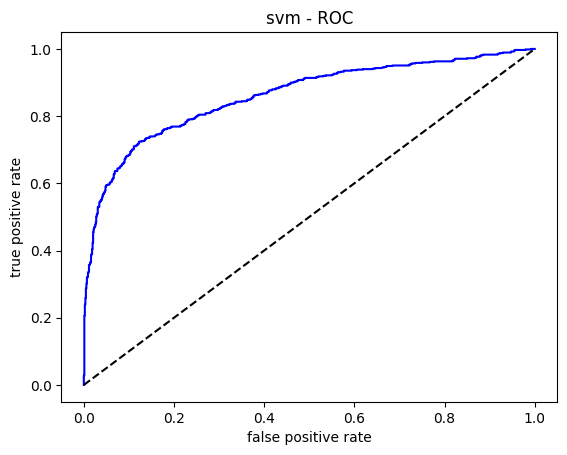

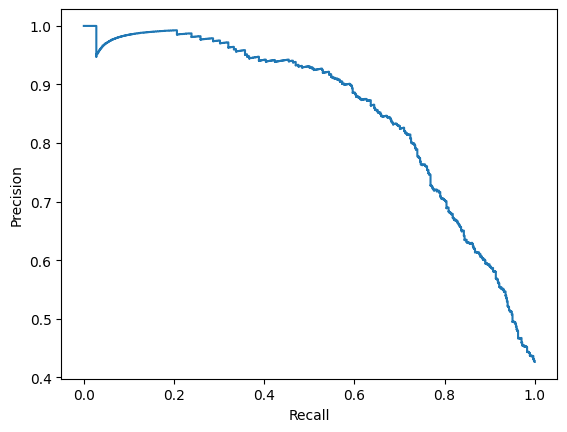

AUC: 86.01%, PRC: 85.29%


In [ ]:
### Load in the features that is engineered above 
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
train_y = np.load('y_train.npy')
test_y = np.load('y_test.npy')

### Best parameters and performance for SVC
model, auc_score, prc_score = create_advanced_model(X_train, train_y, X_test, test_y, model_type='svm', print_result=True)

Best parameter (f1 score=0.791):
{'clf__alpha': 0.01}
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       874
           1       0.79      0.69      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



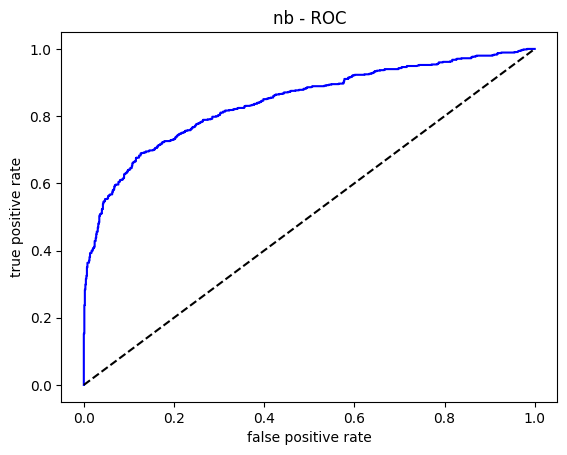

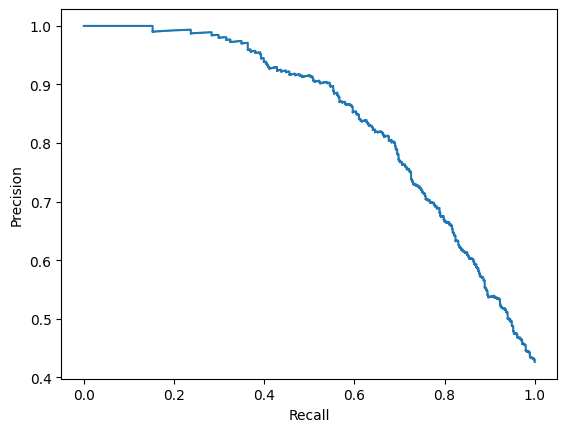

AUC: 84.23%, PRC: 84.02%


In [ ]:
### Best parameters and performance for Naive Bayes
model, auc_score, prc_score = create_advanced_model(X_train, train_y, X_test, test_y, model_type='nb', print_result=True)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

Best parameter (f1 score=0.771):
{'clf__C': 4.281332398719396, 'clf__max_iter': 100, 'clf__penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       874
           1       0.81      0.73      0.77       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



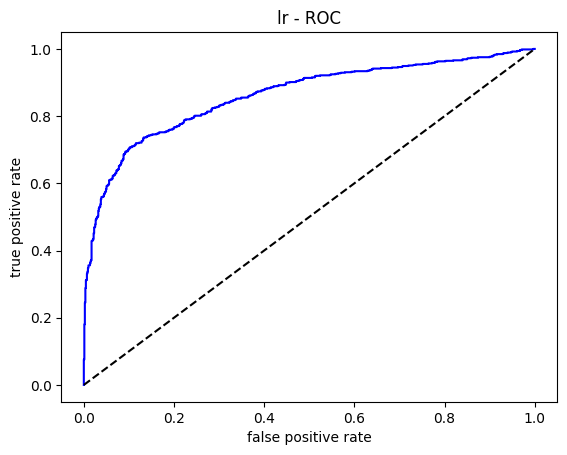

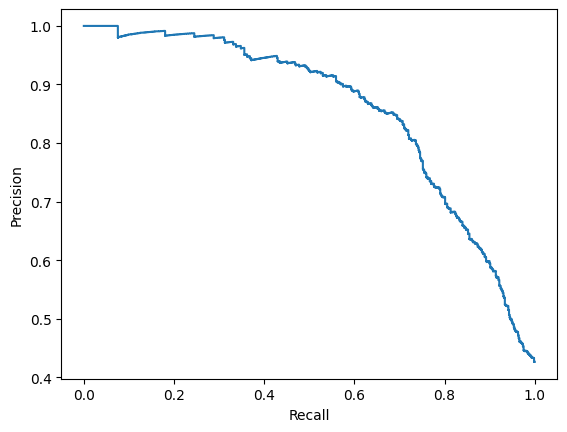

AUC: 86.11%, PRC: 85.61%


In [4]:
### Best parameters and performance for Logistic regression
model, auc_score, prc_score = create_advanced_model(X_train, train_y, X_test, test_y, model_type='lr', print_result=True)


In [7]:
### Performance of the default models from feature engineering
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score
 
 # Build the machine learning model using Logistic Regression, Naive Bayes, and Linear SVC
estimators = [
    ("lr", LogisticRegression()),
    ("nb", MultinomialNB()),
    ("svc", LinearSVC())
]
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression())

clf.fit(X_train,train_y)
#Make predictions on the testing data

y_pred = clf.predict(X_test)
# y_pred = clf.predict(X_test_tf)
# y_pred = clf.predict(X_test_Ct)

#Evaluate the model's performance
print("Accuracy score:", accuracy_score(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy score: 0.8102429415627052
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       874
           1       0.81      0.73      0.77       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



In [5]:
### Performance of using the best parameters from the three models
### This actually performs worse than the one without tuning parameters
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score
 
 # Build the machine learning model using Logistic Regression, Naive Bayes, and Linear SVC
estimators = [
    ("lr", LogisticRegression(C=4.281332398719396,penalty='l2',max_iter=100)),
    ("nb", MultinomialNB(alpha=0.01)),
    ("svc", svm.LinearSVC(C=0.615848211066026,penalty='l2'))
]

clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression())

clf.fit(X_train,train_y)
#Make predictions on the testing data

y_pred = clf.predict(X_test)
# y_pred = clf.predict(X_test_tf)
# y_pred = clf.predict(X_test_Ct)

#Evaluate the model's performance
print("Accuracy score:", accuracy_score(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy score: 0.8003939592908733
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       874
           1       0.79      0.73      0.76       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [6]:
### Performance of using the best parameters only from logistic regression and Linear SVC
### This actually performs the best
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score
 
 # Build the machine learning model using Logistic Regression, Naive Bayes, and Linear SVC
estimators = [
    ("lr", LogisticRegression(C=4.281332398719396,penalty='l2',max_iter=100)),
    ("nb", MultinomialNB(alpha=1.0)),
    ("svc", svm.LinearSVC(C=0.615848211066026,penalty='l2'))
]

clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression())

clf.fit(X_train,train_y)
#Make predictions on the testing data

y_pred = clf.predict(X_test)
# y_pred = clf.predict(X_test_tf)
# y_pred = clf.predict(X_test_Ct)

#Evaluate the model's performance
print("Accuracy score:", accuracy_score(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy score: 0.8108995403808273
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       874
           1       0.81      0.73      0.77       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523

